# App rating prediction Project

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
app_rating=pd.read_csv("googleplaystore.csv")

In [3]:
app_rating.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
#Finding no of null values present in the dataset
app_rating.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#dropping null values
df=app_rating.dropna()

In [6]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
#Incorrect type and inconsistent formatting correction
df=df[-df['Size'].str.contains('Var')]

In [15]:
#Removing character 'Varies with device' in Size column
df.loc[:,'SizeNum']=df.Size.str.rstrip('Mk+')
#Converting Size column from str to numeric
df.SizeNum=pd.to_numeric(df['SizeNum'])
df.SizeNum.dtype

dtype('float64')

In [16]:
#Converting Mb into kb in Size column
df['SizeNum']=np.where(df.Size.str.contains('M'),df.SizeNum*1000,df.SizeNum)

In [17]:
df.SizeNum

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: SizeNum, Length: 7723, dtype: float64

In [18]:
#replacing SizeNum in Size
df.Size=df.SizeNum

In [20]:
#dropping SizeNum
df.drop('SizeNum',axis=1,inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df.Reviews.dtype

dtype('O')

In [23]:
#Converting Reviews column into numeric data type from str
df.Reviews=pd.to_numeric(df.Reviews)

In [24]:
#Removing '+,' characters in Installs column
df.Installs=df.Installs.str.replace('+','')

<ipython-input-24-8fce8c94444a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Installs=df.Installs.str.replace('+','')


In [25]:
df.Installs=df.Installs.str.replace(',','')

In [26]:
#Converting Installs column into numeric data type from str
df.Installs=pd.to_numeric(df.Installs)

In [27]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [28]:
#removing $ sign in Price column and converting it into Numeric
df.Price=df.Price.str.replace('$','')
df.Price=pd.to_numeric(df.Price)

<ipython-input-28-86f674aa5a99>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Price=df.Price.str.replace('$','')


In [30]:
df.Price.dtype

dtype('float64')

In [31]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store
#Dropping the rows that have a value outside this range
df=df[(df.Rating>=1)& (df.Rating<5)]

In [33]:
len(df.index)

7454

In [112]:
#Reviews should not be more than installs as only those who installed can review the app
#If there are any such records, drop them.
df.drop(df.index[df.Reviews>df.Installs],axis=0,inplace=True)
len(df.index)

7044

In [37]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows
type_free_and_pricegt_0=df.index[((df["Price"]=="Free")&(df.Price>0))]

In [38]:
if len(type_free_and_pricegt_0)>0:
    print("dropping price free with price>0 : ",type_free_and_pricegt_0)
    df.drop(type_free_and_pricegt_0,axis=0,inplace=True)
else:
    print("No free apps found")

No free apps found


C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

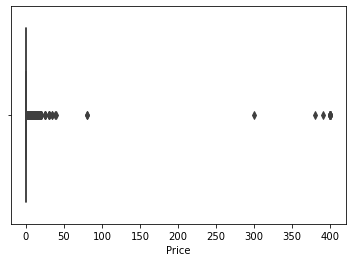

In [41]:
#univariate analysis
sns.boxplot(df["Price"])

Price of apps are usually less than 50$ in playstore

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

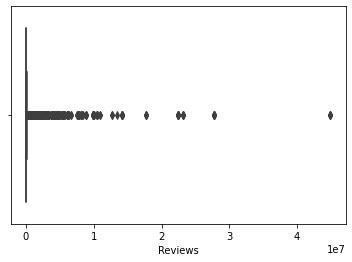

In [42]:
sns.boxplot(df["Reviews"])

Most Apps get about less than 2M review. Roughly, greater than 2M can be
considered outliers

<AxesSubplot:xlabel='Rating', ylabel='Count'>

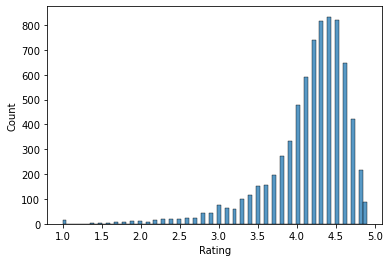

In [45]:
sns.histplot(df["Rating"])

Ratings are more towards higher 

<AxesSubplot:xlabel='Size', ylabel='Count'>

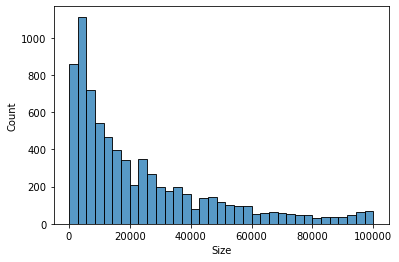

In [46]:
sns.histplot(df["Size"])

In [48]:
#From the box plot, it seems like there are some apps with very high price.
#A price of $200 for an application on the Play Store is very high and suspicious!
#Check out the records with very high price
#Is 200 indeed a high price?
Drop these as most seem to be junk apps
df[df["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [52]:
df.drop(df.index[(df.Price>=200)],inplace=True)

In [53]:
len(df.index)

7439

In [54]:
#Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, 
#in fact, will skew it.
#Drop records having more than 2 million reviews
df[df["Reviews"]>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [55]:
df.drop(df.index[(df.Reviews>2000000)],inplace=True)

In [57]:
len(df.index)

7220

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

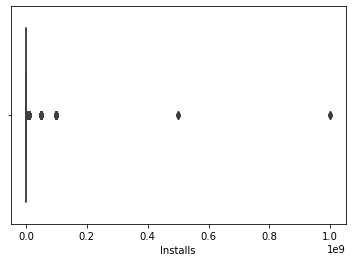

In [58]:

sns.boxplot(df["Installs"])

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs', ylabel='count'>

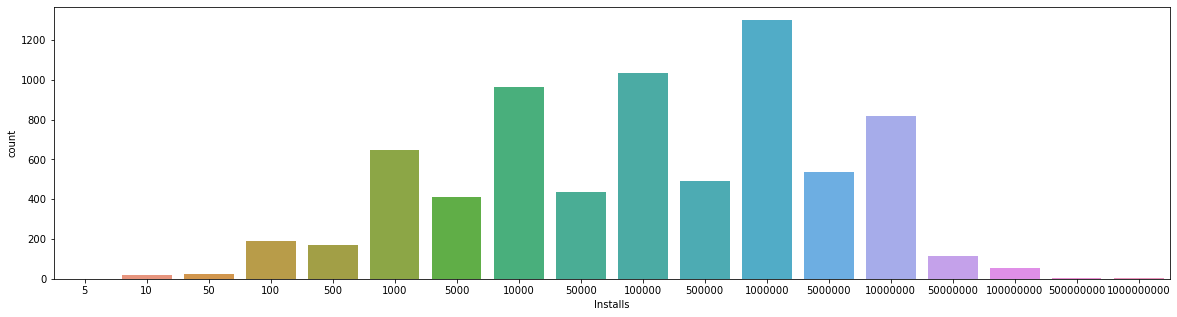

In [60]:
plt.figure(figsize=(20,5))
sns.countplot(df["Installs"])

In [62]:
installs_10_per=np.percentile(df.Installs,10)
installs_10_per

1000.0

In [64]:
installs_25_per=np.percentile(df.Installs,25)
installs_25_per

10000.0

In [65]:
installs_50_per=np.percentile(df.Installs,50)
installs_50_per

100000.0

In [66]:
installs_70_per=np.percentile(df.Installs,70)
installs_70_per

1000000.0

In [67]:
installs_90_per=np.percentile(df.Installs,90)
installs_90_per

10000000.0

In [68]:
installs_95_per=np.percentile(df.Installs,95)
installs_95_per

10000000.0

In [69]:
installs_99_per=np.percentile(df.Installs,99)
installs_99_per

50000000.0

In [ ]:
#Let us consider apps more then 99 percent is an outlier and these values to be dropped from the analysis

In [71]:
len(df[df.Installs>=installs_99_per])

176

In [74]:
df.drop(df.index[df.Installs>=installs_99_per],axis=0,inplace=True)

In [75]:
len(df.index)

7044

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Price'>

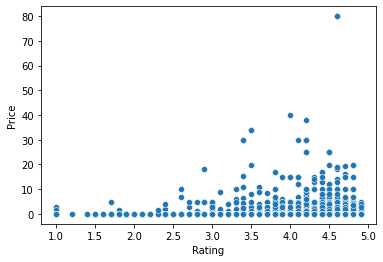

In [76]:
#Bivariate analysis
sns.scatterplot(df["Rating"],df["Price"])

There is a mild increase in Rating with increase in price

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


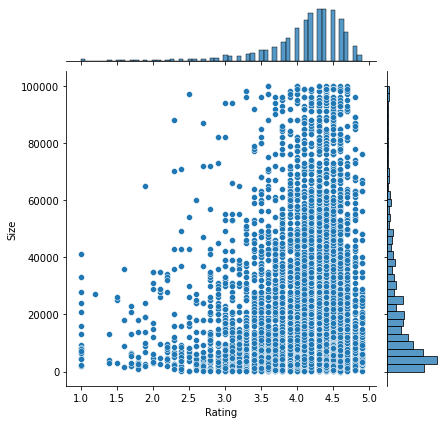

In [77]:
sns.jointplot(df["Rating"],df["Size"])

No relation between Rating and size

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


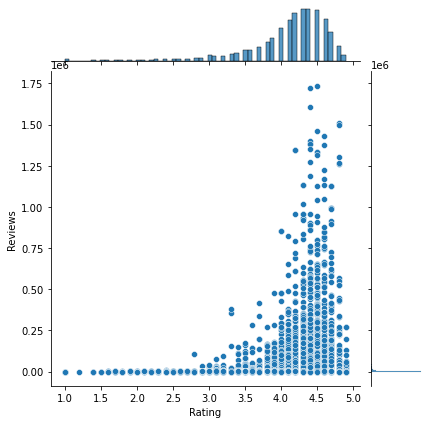

In [78]:
sns.jointplot(df["Rating"],df["Reviews"])

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

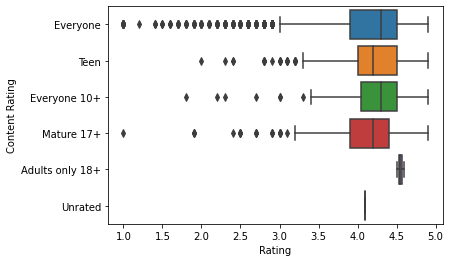

In [79]:
sns.boxplot(df["Rating"],df["Content Rating"])

No Major differences in rating

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

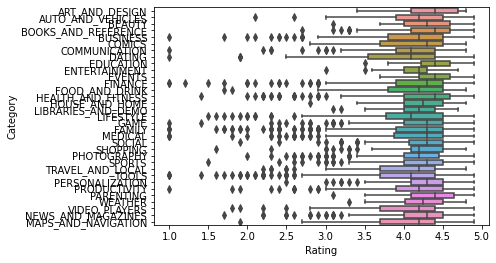

In [81]:
sns.boxplot(df["Rating"],df["Category"])

In [82]:
#create a copy of the dataframe to make all the edits. Name it inp1.
inp1=df.copy()

In [84]:
#Reviews and Install have some values that are still relatively very high. Before building a linear regression model, 
#you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [85]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [86]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1.drop(columns=["App", "Last Updated", "Current Ver", "Android Ver"],axis=1,inplace=True)

In [87]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [88]:
#Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand
#categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
inp2=pd.get_dummies(inp1)

In [90]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,1.804211,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,2.063723,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
set(inp2.columns)

{'Category_ART_AND_DESIGN',
 'Category_AUTO_AND_VEHICLES',
 'Category_BEAUTY',
 'Category_BOOKS_AND_REFERENCE',
 'Category_BUSINESS',
 'Category_COMICS',
 'Category_COMMUNICATION',
 'Category_DATING',
 'Category_EDUCATION',
 'Category_ENTERTAINMENT',
 'Category_EVENTS',
 'Category_FAMILY',
 'Category_FINANCE',
 'Category_FOOD_AND_DRINK',
 'Category_GAME',
 'Category_HEALTH_AND_FITNESS',
 'Category_HOUSE_AND_HOME',
 'Category_LIBRARIES_AND_DEMO',
 'Category_LIFESTYLE',
 'Category_MAPS_AND_NAVIGATION',
 'Category_MEDICAL',
 'Category_NEWS_AND_MAGAZINES',
 'Category_PARENTING',
 'Category_PERSONALIZATION',
 'Category_PHOTOGRAPHY',
 'Category_PRODUCTIVITY',
 'Category_SHOPPING',
 'Category_SOCIAL',
 'Category_SPORTS',
 'Category_TOOLS',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS',
 'Category_WEATHER',
 'Content Rating_Adults only 18+',
 'Content Rating_Everyone',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'Content Rating_Teen',
 'Content Rating_Unrated',
 'G

In [92]:
data=inp2.drop(columns='Rating')
data.shape

(7044, 157)

In [93]:
target=pd.DataFrame(inp2.Rating)
target.shape

(7044, 1)

In [94]:
#Linear ref=gression model
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=3)

In [96]:
print("X_train.shape is ",X_train.shape)
print("X_test.shape is ",X_test.shape)
print("y_train.shape is ",y_train.shape)
print("y_test.shape is ",y_test.shape)


X_train.shape is  (4930, 157)
X_test.shape is  (2114, 157)
y_train.shape is  (4930, 1)
y_test.shape is  (2114, 1)


In [98]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()

In [101]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
lr.score(X_test,y_test)

0.1324371814132873

In [104]:
lr.intercept_

array([3.28960022])

In [105]:
lr.coef_

array([[ 1.03119542e+00, -6.84247544e-08, -9.98099159e-02,
        -1.88055193e-04, -3.11178204e-01,  2.74511937e-02,
         1.20003787e-01,  7.21975614e-02, -4.85305282e-03,
         1.51223364e-01, -5.23571493e-02, -1.00750943e-01,
         5.42826325e-03, -3.29307559e-02,  1.53580898e-01,
         2.55740685e-03, -4.86872396e-02, -4.86171978e-02,
         2.69166363e-01, -2.59574668e-02, -1.60948415e-02,
         4.68791294e-02, -1.07733936e-01, -5.75433910e-02,
         6.56171344e-03, -2.72194375e-02,  4.65125754e-02,
         6.19411190e-02, -4.71382988e-02, -1.94510401e-02,
        -2.58883777e-02, -8.42624663e-03,  1.22761108e-01,
        -8.56117390e-02, -6.72513684e-02,  2.55591381e-03,
        -1.12971044e-03, -9.95754855e-03,  9.95754857e-03,
         3.35712556e-01, -8.11023764e-02, -6.97627222e-02,
        -1.10400045e-01, -7.44474122e-02, -1.90053528e-12,
        -2.76171741e-01, -5.07211884e-03, -3.75803360e-01,
        -1.74988287e-02,  1.67793240e-01, -1.75486030e-0

In [107]:
prediction=lr.predict(X_test)

In [108]:
from sklearn.metrics import r2_score

In [110]:
lr_train=lr.predict(X_train)
print("R2 value of the model(by train) is ", r2_score(y_train,lr_train))

R2 value of the model(by train) is  0.16986779654598638


In [111]:
lr_test=lr.predict(X_test)
print("R2 value of the model(by test) is ", r2_score(y_test,lr_test))

R2 value of the model(by test) is  0.1324371814132873
